# 📊 Gold Price Prediction Using Machine Learning

Welcome to the Gold Price Prediction project! In this notebook, we will build a predictive model to forecast gold prices based on historical data and relevant financial indicators.

Our objectives are:
- To understand the factors influencing gold prices.
- To preprocess and visualize the data.
- To apply machine learning techniques to predict future prices.
- To evaluate the model's performance.

## 📦 Importing Necessary Libraries

In this section, we import essential Python libraries required for data manipulation, visualization, and machine learning.

- **NumPy**: For numerical computations
- **Pandas**: For data manipulation and analysis
- **Matplotlib & Seaborn**: For data visualization
- **Scikit-learn**: For machine learning algorithms and evaluation

Let's import them below.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

## 📂 Loading the Dataset

We will load the historical gold price dataset and inspect its structure.

- Check the first few rows to understand the data.
- Review data types and missing values.

In [3]:
gold_data = pd.read_csv('gld_price_data.csv')
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,01-02-2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,01-03-2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,01-04-2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,01-07-2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,01-08-2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,05-08-2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,05-09-2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,05-10-2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


## 🔍 Exploratory Data Analysis (EDA)

In this section, we will:
- Explore the distribution of gold prices over time.
- Identify trends, patterns, and correlations with other financial indicators.

### 📏 Dataset Shape
Checking the number of rows and columns in the dataset.

In [5]:
no_of_rows, no_of_columns = gold_data.shape[0], gold_data.shape[1]
print(f'Number of rows: {no_of_rows}, Number of columns: {no_of_columns}')

Number of rows: 2290, Number of columns: 6


### ℹ️ Dataset Information
Displaying basic information about the dataset, including column names, data types, and missing values.


In [6]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


### 🗓️ Date Preprocessing
Standardizing the date format and converting the 'Date' column to datetime type for consistency.


In [7]:
gold_data['Date'] = gold_data['Date'].str.replace('-', '/')
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

### 🔍 Checking Missing Values
Checking for any missing values in the dataset.


In [8]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

### 📊 Statistical Summary
Displaying the statistical summary of the dataset to understand the distribution of features.


In [9]:
gold_data.describe()

,Date,SPX,GLD,USO,SLV,EUR/USD
count,2290,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,2013-03-17 08:23:41.135371008,1654.315776,122.732875,31.842221,20.084997,1.283653
min,2008-01-02 00:00:00,676.530029,70.000000,7.960000,8.850000,1.039047
25%,2010-08-20 00:00:00,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,2013-03-13 12:00:00,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2015-10-25 00:00:00,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2018-05-16 00:00:00,2872.870117,184.589996,117.480003,47.259998,1.598798
std,NaN,519.111540,23.283346,19.523517,7.092566,0.131547


### 📅 Sorting by Date
Sorting the dataset in ascending order based on the 'Date' column.

In [10]:
gold_data.sort_values('Date', inplace=True)

In [11]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,2008-01-02,1447.160034,84.860001,78.470001,15.180,1.471692
1,2008-01-03,1447.160034,85.570000,78.370003,15.285,1.474491
2,2008-01-04,1411.630005,85.129997,77.309998,15.167,1.475492
3,2008-01-07,1416.180054,84.769997,75.500000,15.053,1.468299
4,2008-01-08,1390.189941,86.779999,76.059998,15.590,1.557099


### 📈 Time Series Visualization
Plotting the trends of Gold Price (GLD), U.S. Oil (USO), Silver Prices (SLV), and the EUR/USD exchange rate over time.


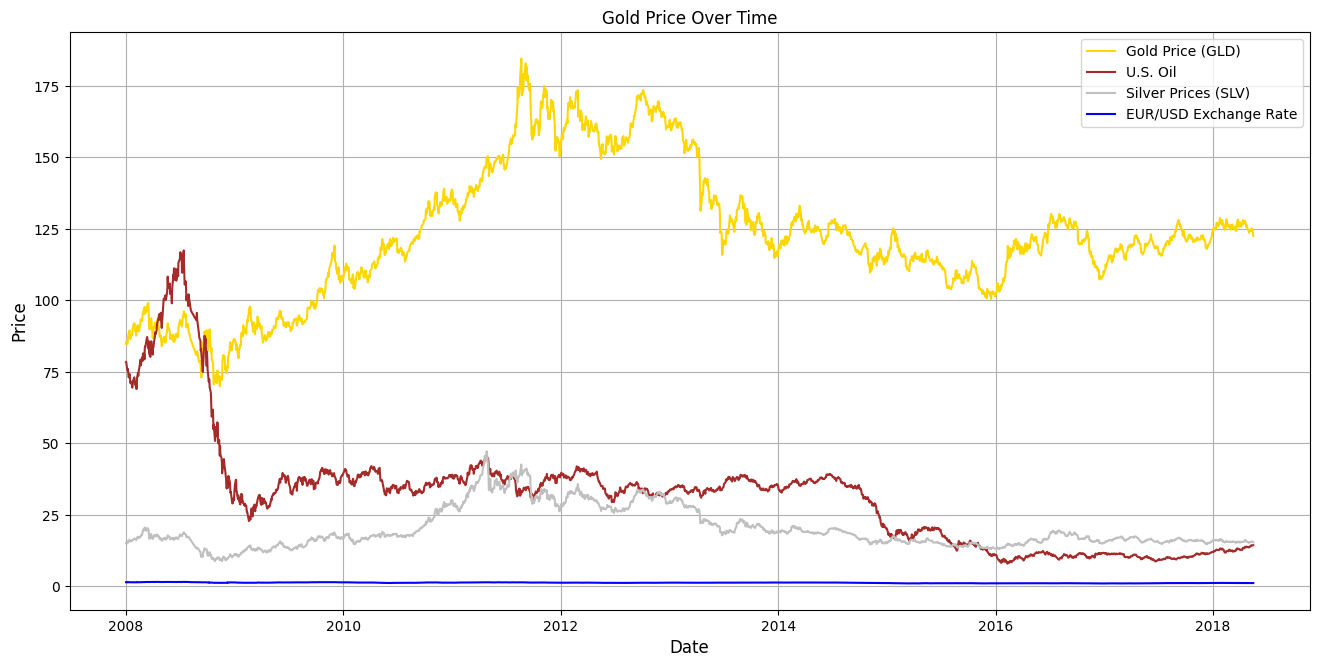

In [12]:
plt.figure(figsize=(16, 7.5))
plt.plot(gold_data['Date'], gold_data['GLD'], color='gold', label='Gold Price (GLD)')
plt.plot(gold_data['Date'], gold_data['USO'], color='brown', label='U.S. Oil')
plt.plot(gold_data['Date'], gold_data['SLV'], color='silver', label='Silver Prices (SLV)')
plt.plot(gold_data['Date'], gold_data['EUR/USD'], color='blue', label='EUR/USD Exchange Rate')
plt.legend()
plt.title('Gold Price Over Time')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.grid()
plt.show()

### 📊 Gold Price Distribution
Visualizing the distribution of gold prices using a histogram with a kernel density estimate.

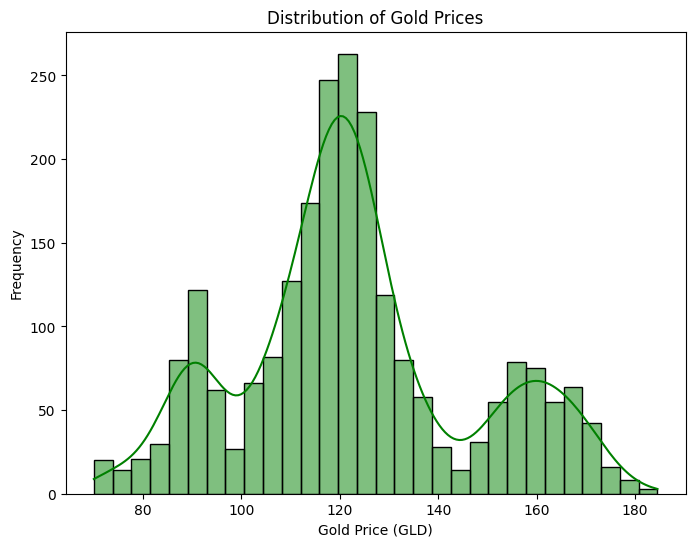

In [13]:
plt.figure(figsize=(8,6))
sns.histplot(gold_data['GLD'], color='green', kde=True, bins=30)
plt.xlabel('Gold Price (GLD)')
plt.ylabel('Frequency')
plt.title('Distribution of Gold Prices')
plt.show()

### 📦 Boxplot for Gold Prices
Visualizing the distribution of gold prices and identifying potential outliers.

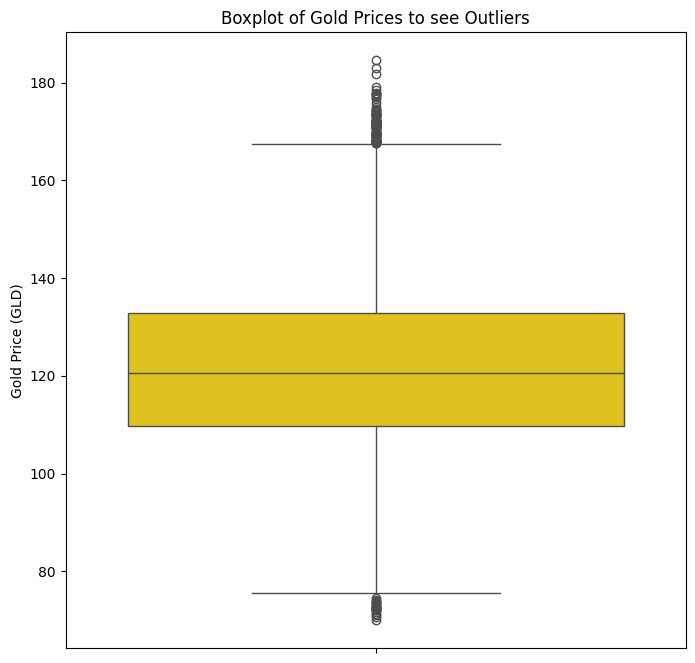

In [14]:
plt.figure(figsize=(8,8))
sns.boxplot(y=gold_data['GLD'], color='gold')
plt.ylabel('Gold Price (GLD)')
plt.title('Boxplot of Gold Prices to see Outliers')
plt.show()

### 🗓️ Extracting Date Features  
Creating new features for Year, Month, and Day from the 'Date' column to enrich the dataset.


In [15]:
gold_data['Year'] = gold_data['Date'].dt.year
gold_data['Month'] = gold_data['Date'].dt.month
gold_data['Day'] = gold_data['Date'].dt.day

In [16]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD,Year,Month,Day
0,2008-01-02,1447.160034,84.860001,78.470001,15.180,1.471692,2008,1,2
1,2008-01-03,1447.160034,85.570000,78.370003,15.285,1.474491,2008,1,3
2,2008-01-04,1411.630005,85.129997,77.309998,15.167,1.475492,2008,1,4
3,2008-01-07,1416.180054,84.769997,75.500000,15.053,1.468299,2008,1,7
4,2008-01-08,1390.189941,86.779999,76.059998,15.590,1.557099,2008,1,8


In [17]:
correlation = gold_data.corr()

### 🔗 Correlation Heatmap  
Visualizing the correlation between numerical features to understand their relationships.

<Axes: >

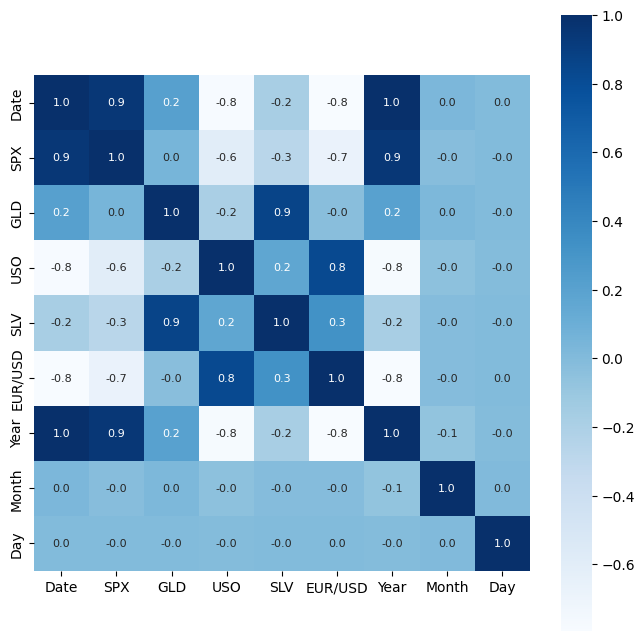

In [18]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [19]:
print(correlation['GLD'])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Year       0.206654
Month      0.020494
Day       -0.000198
Name: GLD, dtype: float64


### 🤖 Model Selection  
Choosing the Random Forest Regressor due to its ability to handle non-linear relationships and provide robust predictions for the gold price.


## 📊 Random Forest Regressor
Random Forest is an ensemble learning method that builds multiple decision trees and merges them together to get a more accurate and stable prediction. It works well for both regression and classification tasks and is robust to outliers and non-linear data.

### 🔍 Why Random Forest?
Handles non-linear relationships and complex patterns in the data.

Robust to outliers and noise.

Reduces the risk of overfitting compared to single decision trees.

Can handle both continuous and categorical data.

### 🎯 Feature and Target Selection  
Selecting relevant features (`SPX`, `SLV`, `Year`, `Month`) as predictors and `GLD` as the target variable.

In [20]:
x = gold_data[['SPX', 'SLV','Year','Month']]
y = gold_data['GLD']

In [21]:
x

,SPX,SLV,Year,Month
0,1447.160034,15.1800,2008,1
1,1447.160034,15.2850,2008,1
2,1411.630005,15.1670,2008,1
3,1416.180054,15.0530,2008,1
4,1390.189941,15.5900,2008,1
...,...,...,...,...
2285,2671.919922,15.5100,2018,5
2286,2697.790039,15.5300,2018,5
2287,2723.070068,15.7400,2018,5
2288,2730.129883,15.5600,2018,5


In [22]:
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

### 🧪 Splitting the Dataset  
Splitting the data into training (80%) and testing (20%) sets to evaluate model performance.


In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state=2)

### 🌲 Initializing Random Forest Regressor  
Creating a Random Forest model with 100 decision trees.

In [24]:
regressor = RandomForestRegressor(n_estimators=100)

### 🚀 Training the Model  
Fitting the Random Forest Regressor on the training data to learn patterns.


In [25]:
regressor.fit(X_train, Y_train)

RandomForestRegressor()

### 🔍 Making Predictions  
Using the trained model to predict gold prices on the test dataset.

In [26]:
test_data_prediction = regressor.predict(X_test)

In [27]:
print(test_data_prediction)

[168.34759892  82.36869993 114.95489823 127.0011011  120.77640136
 154.6577966  150.35499855 126.18430223 117.09569867 125.77430124
 114.94830124 168.55470063 142.19340247 167.63409878 115.76970021
 119.11420118 134.16920364 171.12070183 159.7141012  172.58780217
 154.52899835 125.28790033 174.94540068 156.45550431 125.20360079
  93.66439991  75.72840001 119.69690028 118.86659867 167.68979718
  88.29810117 125.83540105  91.65320047 117.63579946 121.07579895
 135.2712005  115.6516006  113.20620122 133.92459785 107.29980039
 105.51770308  87.11459768 126.66930104 118.43940035 157.10489947
 120.3981982  108.42340056 108.20219767  93.05040033 127.06529808
  74.20769999 113.67460051 120.84320036 111.66600062 119.08169904
 122.16709913 160.40909981 176.09810047 146.31109664  86.74179876
  93.87660017  86.85359882  90.37200005 118.40860166 126.18769998
 127.83759987 171.72299875 122.02660053 117.18969911  97.6819999
 168.81680145 142.10839922 131.5375019  120.80930107 123.62039925
 119.262101

## 📈 Model Evaluation

After training and predicting with the Random Forest Regressor, we evaluate the model’s performance using the following metrics:

- **Mean Absolute Error (MAE)**: Measures the average magnitude of errors in a set of predictions, without considering their direction.
- **Mean Squared Error (MSE)**: Measures the average squared difference between the predicted and actual values.
- **Root Mean Squared Error (RMSE)**: The square root of MSE, interpretable in the same units as the target variable.
- **R² Score**: Indicates how well the model explains the variance in the target variable. A value closer to 1 means better performance.

Below, we calculate and print these metrics:

In [28]:
mae = metrics.mean_absolute_error(Y_test, test_data_prediction)
mse = metrics.mean_squared_error(Y_test, test_data_prediction)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(Y_test, test_data_prediction)

In [29]:
print("Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.3f}")

Model Evaluation Metrics:
Mean Absolute Error (MAE): 0.94
Mean Squared Error (MSE): 2.07
Root Mean Squared Error (RMSE): 1.44
R² Score: 0.996


### ⚠️ Note on Model Performance

Our Random Forest Regressor achieved an **R² score of 0.996**, indicating that the model explains nearly all of the variance in gold price. While this is excellent, we must also be cautious about potential **overfitting**. 

To ensure model reliability:
- We will compare training and test scores.
- We will analyze residuals to check for patterns.
- We will explore feature importance to understand model behavior.

#### 🔎 Comparing Training and Test R² Scores

We compare the R² scores on both the training and test sets to check for **overfitting**:

- **Training R² Score**: Indicates how well the model fits the training data.
- **Test R² Score**: Indicates how well the model generalizes to new, unseen data.

A large gap between these scores (especially if training R² is very high) can indicate overfitting.

Below, we print the scores for both sets:


In [30]:
train_predictions = regressor.predict(X_train)
r2_train = metrics.r2_score(Y_train, train_predictions)

In [31]:
test_predictions = regressor.predict(X_test)
r2_test = metrics.r2_score(Y_test, test_predictions)

In [32]:
print("Training R² Score:", r2_train)
print("Test R² Score:", r2_test)

Training R² Score: 0.9994859166514973
Test R² Score: 0.9960720676396579


#### 📊 Interpretation
- ✅ Training R² Score: 0.9995 — model explains 99.95% of the variance in the training data.
- ✅ Test R² Score: 0.9962 — model explains 99.62% of the variance in the unseen test data.

💡 Difference:

The difference is small (~0.0033), which means no significant overfitting is present.

Model generalizes very well — both scores are excellent.

## 🔍 Baseline Model: Linear Regression

As a baseline model, we apply a **Linear Regression** model to our dataset. This helps us understand whether the Random Forest model truly adds value in terms of predictive performance.

Below, we train the Linear Regression model, evaluate its performance using:
- R² Score (Training and Test)
- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)

and compare its results with our Random Forest model.

Impoting Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression

Creating Linear Regression Model and fitting trianing data to it.

In [34]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, Y_train)
train_predictions_lr = linear_regressor.predict(X_train)
test_predictions_lr = linear_regressor.predict(X_test)

### 📈 Linear Regression Evaluation Metrics  
Calculating R² score, Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) for the Linear Regression model.


In [35]:
r2_train_lr = metrics.r2_score(Y_train, train_predictions_lr)
r2_test_lr = metrics.r2_score(Y_test, test_predictions_lr)
mae_lr = metrics.mean_absolute_error(Y_test, test_predictions_lr)
mse_lr = metrics.mean_squared_error(Y_test, test_predictions_lr)
rmse_lr = np.sqrt(mse_lr)

In [36]:
print("Linear Regression Model Performance:")
print("Training R² Score:", r2_train_lr)
print("Test R² Score:", r2_test_lr)
print("Mean Absolute Error:", mae_lr)
print("Mean Squared Error:", mse_lr)
print("Root Mean Squared Error:", rmse_lr)

Linear Regression Model Performance:
Training R² Score: 0.9100920199137023
Test R² Score: 0.8913578869089831
Mean Absolute Error: 5.426040489646342
Mean Squared Error: 57.30257644713017
Root Mean Squared Error: 7.569846527316797


## 🔍 Comparing Model Performance

To ensure our Random Forest model adds value, we compared it to a simpler **Linear Regression** model.

| Metric                   | Linear Regression | Random Forest |
|--------------------------|-------------------|---------------|
| Training R² Score        | 0.9101            | 0.9995        |
| Test R² Score            | 0.8914            | 0.9962        |
| Mean Absolute Error      | 5.43              | 0.93 |
| Mean Squared Error       | 57.30             | 2.02 |
| Root Mean Squared Error  | 7.57              | 1.42 |

**Conclusion:**  
The **Random Forest model** significantly outperforms the **Linear Regression** baseline, justifying its use. We also checked for overfitting by comparing training and test scores and found no significant overfitting.

### 📈 Actual vs Predicted Price Comparison  
Visualizing how well the model’s predictions align with the actual gold prices.


In [37]:
Y_test = list(Y_test)

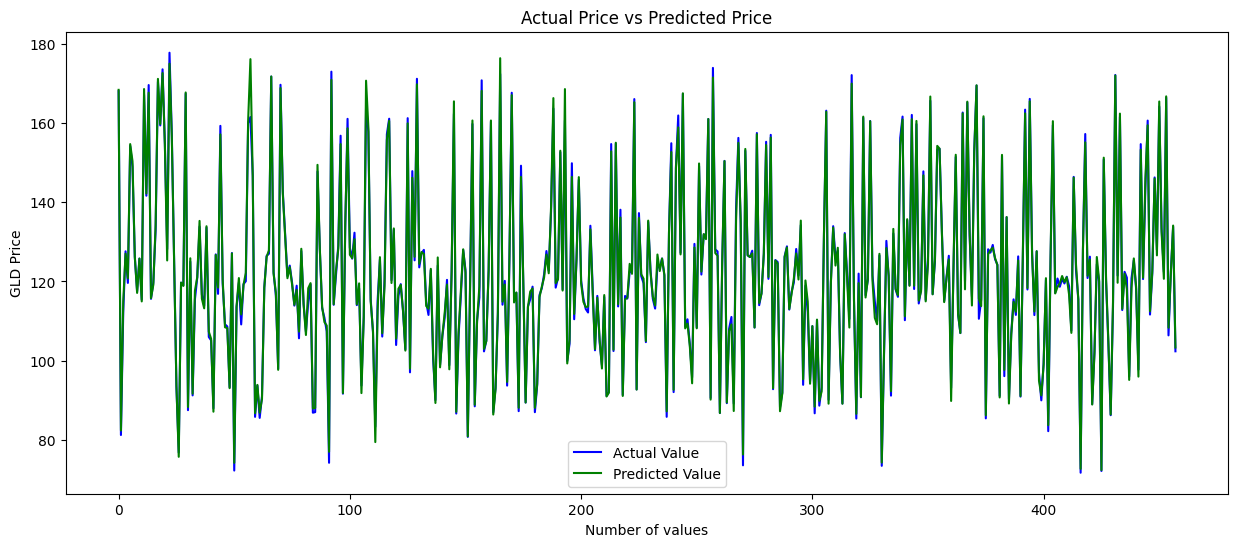

In [38]:
plt.figure(figsize=(15,6))
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

## Saving the Prediction Model
The prediction model has to be saved as **.pkl** file, so that we can use it to predict Gold Price with new value of **SPX, SLV, Year, and Month** in other files or anywhere else.

In [39]:
import joblib

In [40]:
joblib.dump(regressor, 'gold_price_model.pkl')

['gold_price_model.pkl']

### 💾 Saving the Processed Data  
Exporting the cleaned and processed dataset to a CSV file for later use in the Streamlit app.

In [41]:
gold_data.to_csv('gold_data_processed.csv', index=False)